<a href="https://colab.research.google.com/github/Theuncannycatalyst/Car_Prices_Analysis_And_Prediction/blob/main/(BP)Motorbike_resale_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving bike_sales_india.csv to bike_sales_india.csv


In [ ]:
import pandas as pd
import numpy as np
#inventory_sample.xlsx = next(iter(uploaded))
df = pd.read_csv("bike_sales_india.csv")
print(df.head())
print(df.info())
print(df.isnull().values.any())


            State  Avg Daily Distance (km)          Brand        Model  \
0       Karnataka                    68.84  Royal Enfield   Hunter 350   
1       Rajasthan                    23.80          Bajaj  Dominar 400   
2  Madhya Pradesh                    27.67            KTM     125 Duke   
3       Karnataka                    62.85       Kawasaki    Ninja 300   
4  Madhya Pradesh                    10.62         Yamaha        FZ V3   

   Price (INR)  Year of Manufacture  Engine Capacity (cc) Fuel Type  \
0       252816                 2021                   672  Electric   
1       131100                 2020                   769    Hybrid   
2       201016                 2020                   216    Hybrid   
3       132482                 2021                   556    Petrol   
4       231796                 2019                   298    Petrol   

   Mileage (km/l) Owner Type  Registration Year Insurance Status Seller Type  \
0           78.41     Second               2024 

In [ ]:
categorical_cols=["State", "Brand", "Model", "Fuel Type", "Owner Type", "Seller Type", "Insurance Status", "City Tier", "Year of Manufacture", "Registration Year"]
for col in categorical_cols:
  print(f"Value counts for {col}:")
  print(df[col].value_counts())
  print("-"*20)
print(categorical_cols)

Value counts for State:
State
Punjab            1051
Maharashtra       1030
Rajasthan         1017
Uttar Pradesh     1003
Gujarat           1002
Tamil Nadu         994
Karnataka          982
Delhi              977
Madhya Pradesh     973
West Bengal        971
Name: count, dtype: int64
--------------------
Value counts for Brand:
Brand
Kawasaki         1291
Yamaha           1283
KTM              1272
Royal Enfield    1253
Hero             1239
TVS              1234
Honda            1221
Bajaj            1207
Name: count, dtype: int64
--------------------
Value counts for Model:
Model
Ray ZR             279
NTorq 125          271
Duke 200           270
250 Duke           269
Classic 350        267
MT-15              267
Vulcan S           267
Interceptor 650    264
Pulsar 150         261
Versys 650         261
Hunter 350         259
Glamour            258
Sport              258
HF Deluxe          257
Unicorn            257
FZ V3              256
Ninja 300          256
Ninja 400          

In [ ]:
numerical_cols = ["Avg Daily Distance (km)", "Price (INR)", "Engine Capacity (cc)", "Mileage (km/l)", "Resale Price (INR)"]
for col in numerical_cols:
  print(f"The mean of {col}:")
  print(df[col].mean())
  print("-"*20)
print(numerical_cols)

The mean of Avg Daily Distance (km):
42.533128000000005
--------------------
The mean of Price (INR):
224328.7224
--------------------
The mean of Engine Capacity (cc):
552.6953
--------------------
The mean of Mileage (km/l):
67.188926
--------------------
The mean of Resale Price (INR):
133828.973998
--------------------
['Avg Daily Distance (km)', 'Price (INR)', 'Engine Capacity (cc)', 'Mileage (km/l)', 'Resale Price (INR)']


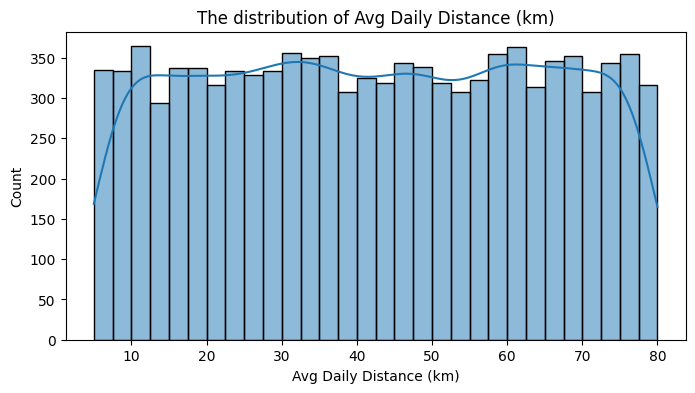

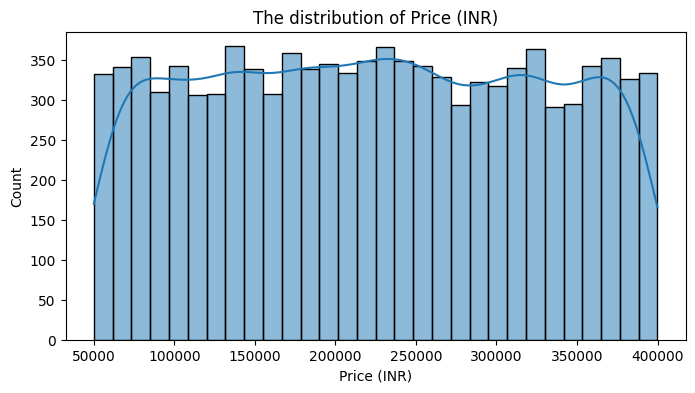

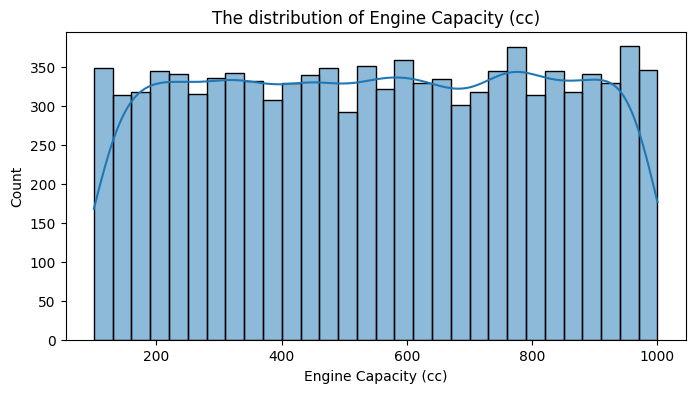

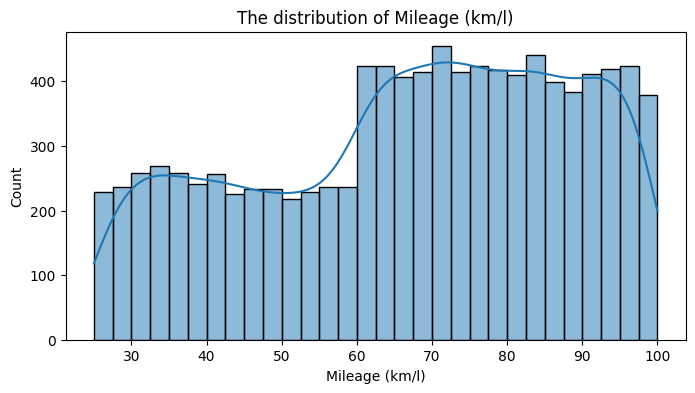

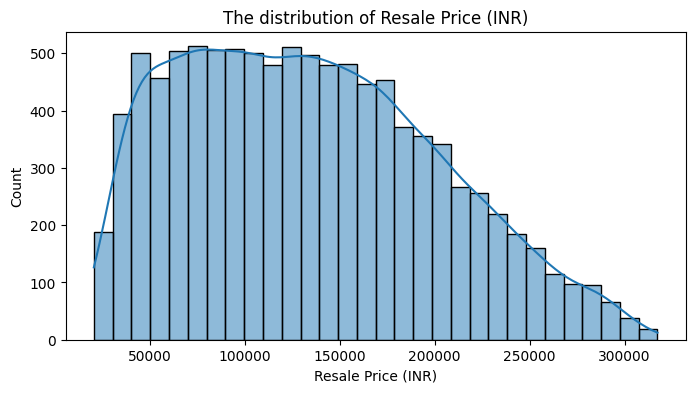

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
for col in numerical_cols:
  plt.figure(figsize=(8, 4))
  sns.histplot(data=df, x=col, bins=30, kde=True)
  plt.title(f"The distribution of {col}")
  plt.xlabel(col)
  plt.ylabel("Count")
  plt.show()

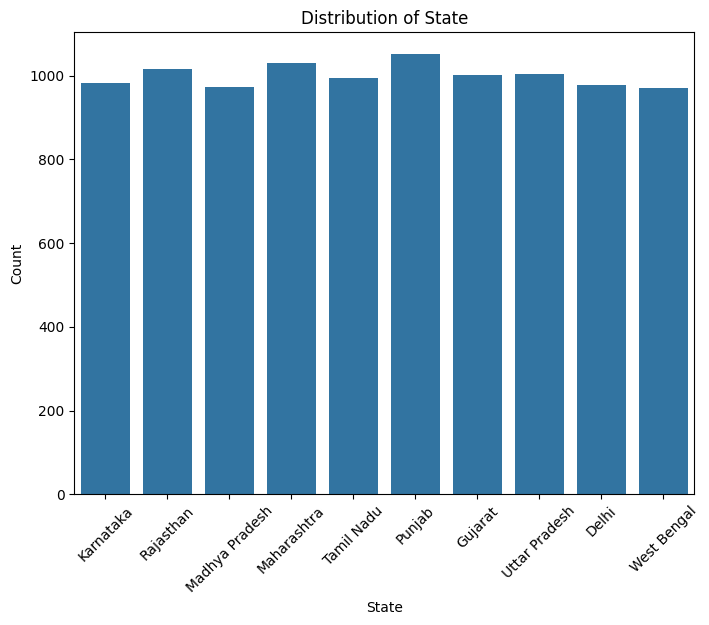

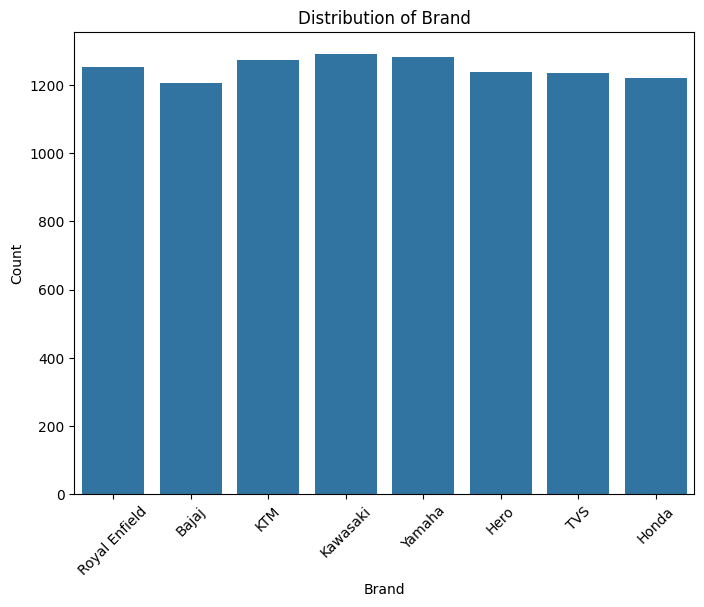

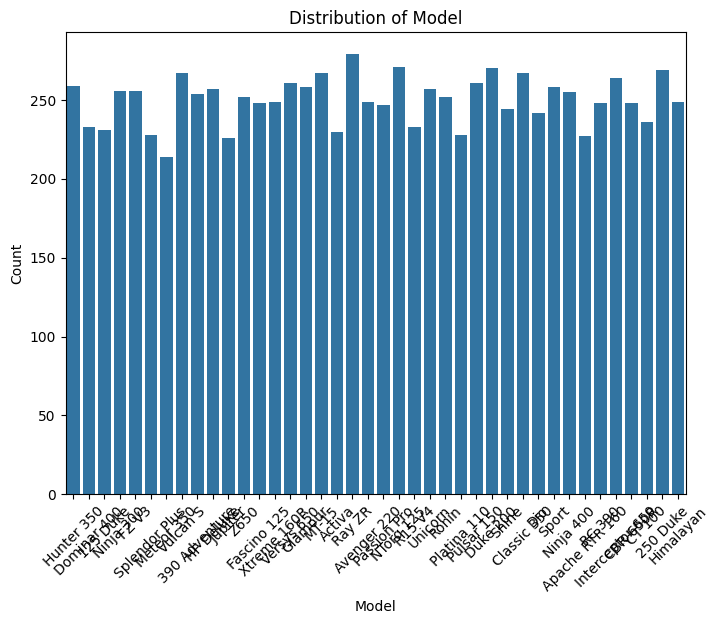

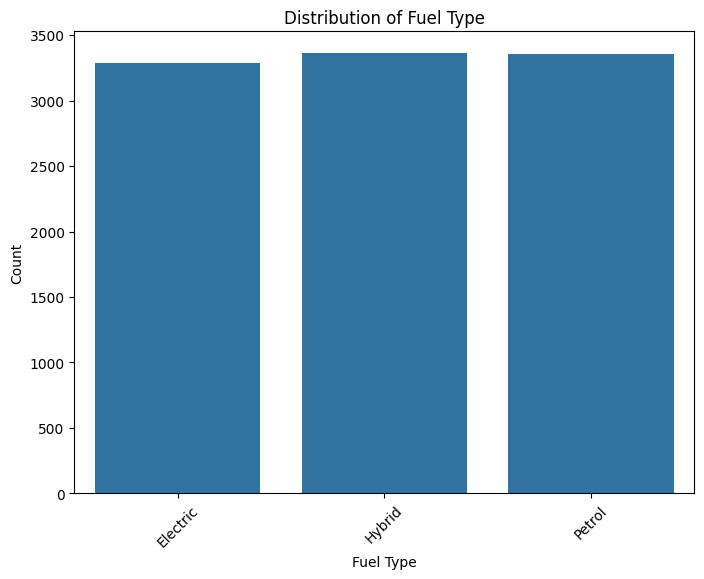

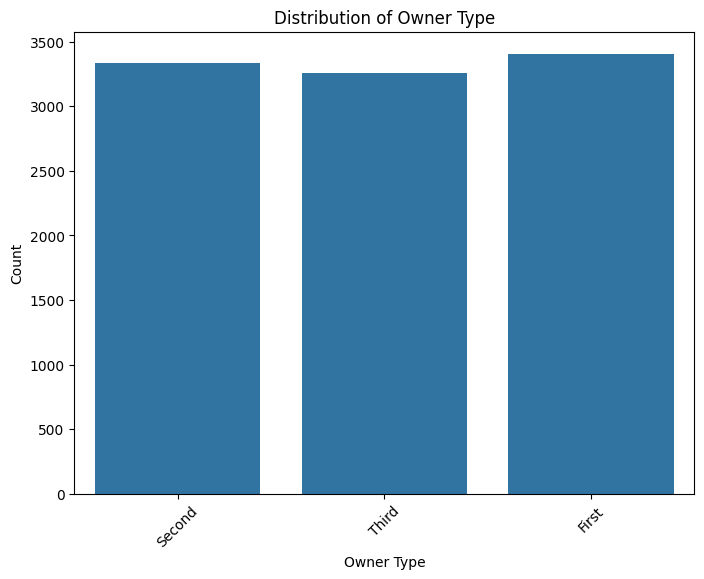

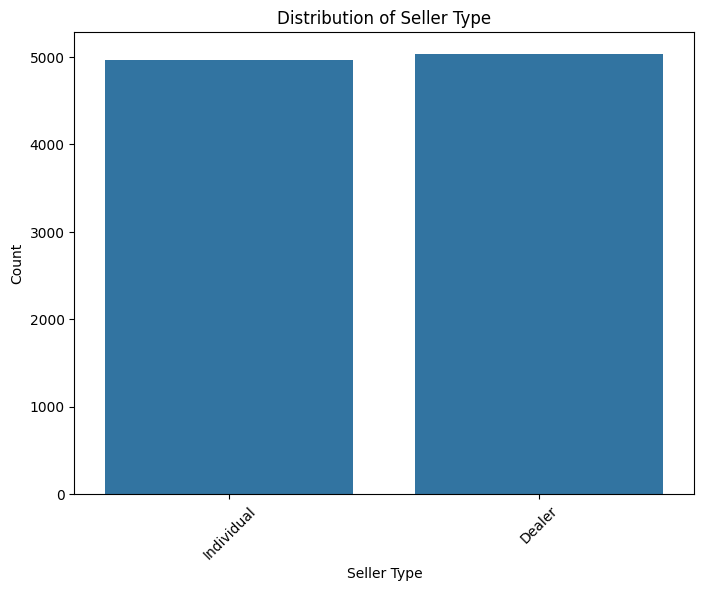

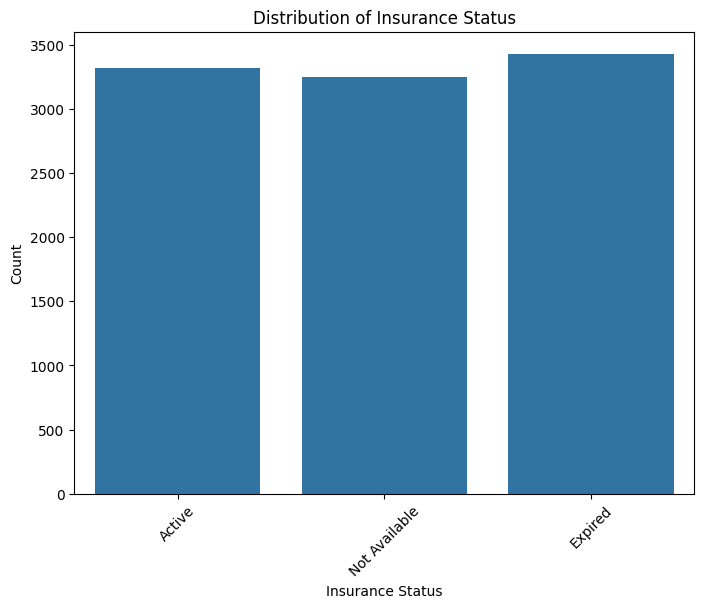

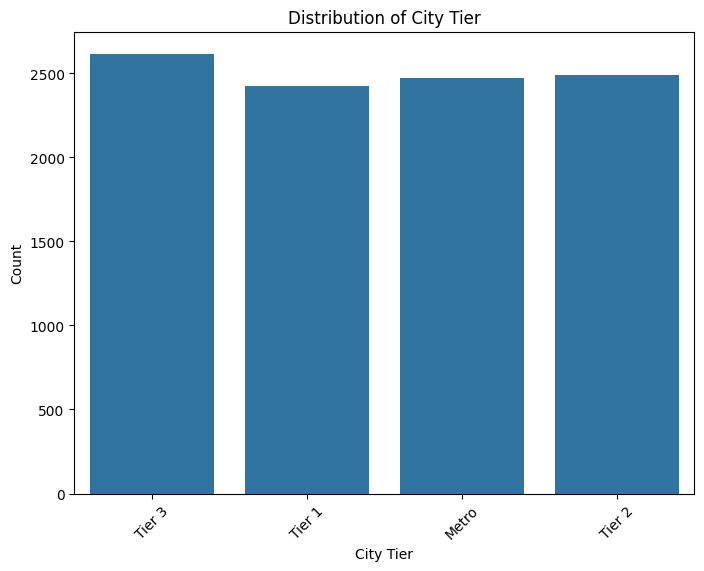

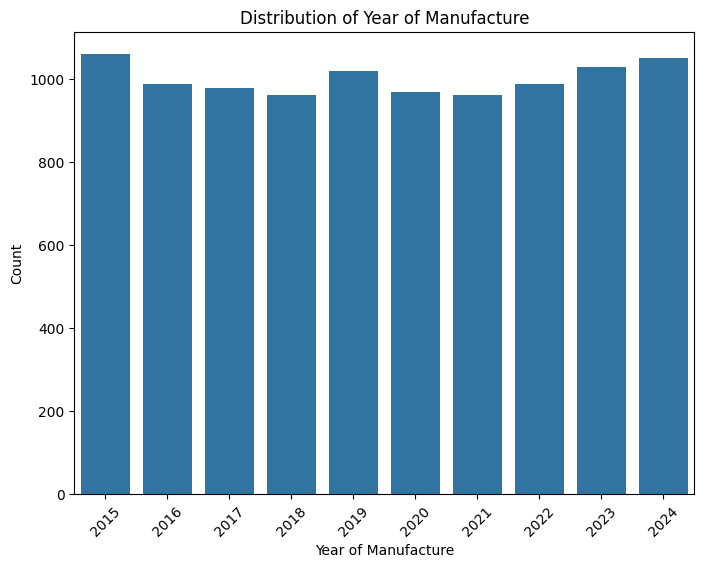

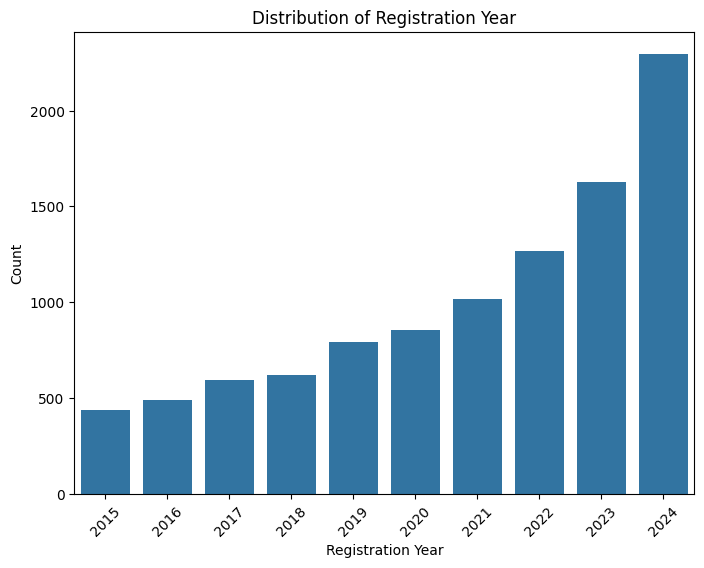

In [ ]:
for col in categorical_cols:
  plt.figure(figsize=(8, 6))
  sns.countplot(x= col, data=df)
  plt.title(f"Distribution of {col}")
  plt.xlabel(col)
  plt.ylabel("Count")
  plt.xticks(rotation=45)
  plt.show()

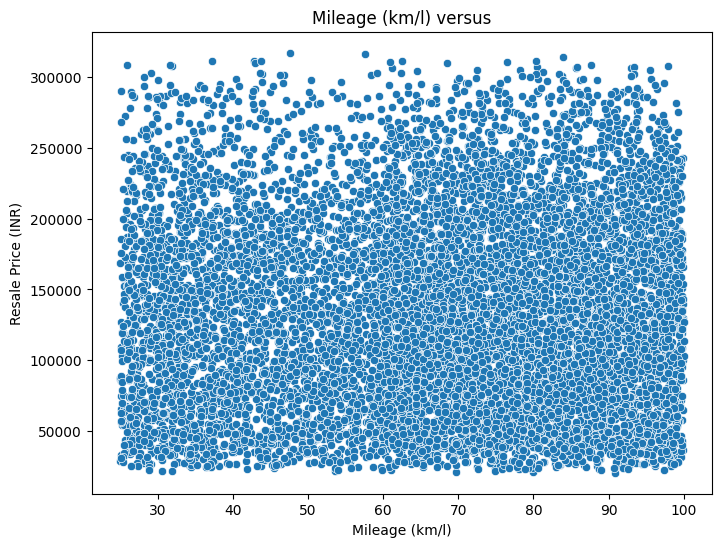

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="Mileage (km/l)", y="Resale Price (INR)")
plt.title("Mileage (km/l) versus")
plt.show()

In [ ]:
correlation_matrix = df[numerical_cols].corr()
print(correlation_matrix)

                         Avg Daily Distance (km)  Price (INR)  \
Avg Daily Distance (km)                 1.000000     0.012124   
Price (INR)                             0.012124     1.000000   
Engine Capacity (cc)                   -0.005903     0.000894   
Mileage (km/l)                          0.009724     0.000498   
Resale Price (INR)                      0.001510     0.905413   

                         Engine Capacity (cc)  Mileage (km/l)  \
Avg Daily Distance (km)             -0.005903        0.009724   
Price (INR)                          0.000894        0.000498   
Engine Capacity (cc)                 1.000000       -0.006772   
Mileage (km/l)                      -0.006772        1.000000   
Resale Price (INR)                   0.003116        0.007183   

                         Resale Price (INR)  
Avg Daily Distance (km)            0.001510  
Price (INR)                        0.905413  
Engine Capacity (cc)               0.003116  
Mileage (km/l)                    

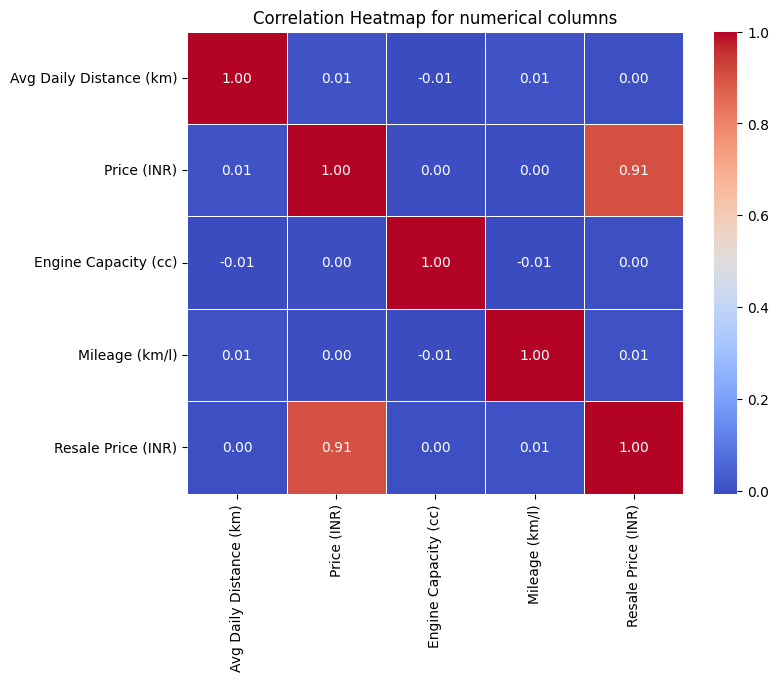

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap for numerical columns")
plt.show()

In [ ]:
print(categorical_cols)

['State', 'Brand', 'Model', 'Fuel Type', 'Owner Type', 'Seller Type', 'Insurance Status', 'City Tier', 'Year of Manufacture', 'Registration Year']


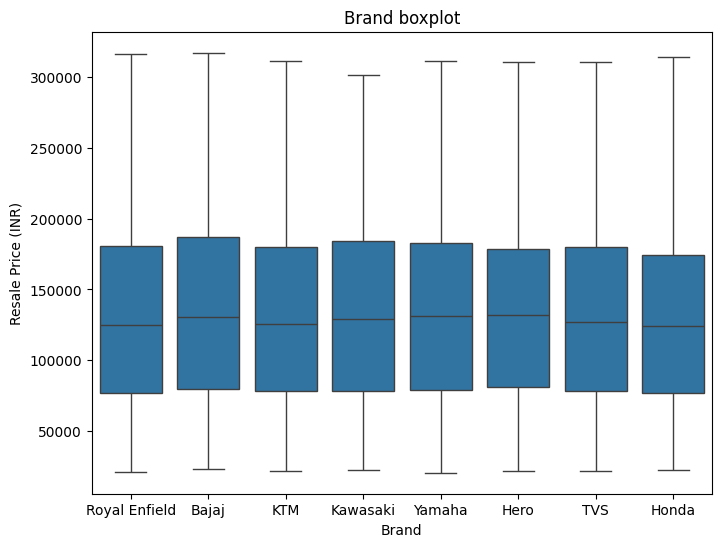

In [ ]:
plt.figure(figsize=(8, 6))
#Avg Daily Distance (km), Price (INR), Engine Capacity (cc), Mileage (km/l), Resale Price (INR)
sns.boxplot(x="Brand", y="Resale Price (INR)", data=df)
plt.title("Brand boxplot")
plt.show()

The goal in machine learning would be predicting sale value and resale value of
the motorbikes brands. Choose the columns to use and create others as necessary. Convert categorical column to numerical column using one hot encoding/label encoding. Split data into test and train. Choose and train model plus feature importance. So in this case, price, avg daily distance, engine capacity, mileage.

In [ ]:
df = pd.get_dummies(df, columns=[col for col in categorical_cols if col in df.columns], prefix="category")
print(df.head())

   Avg Daily Distance (km)  Price (INR)  Engine Capacity (cc)  Mileage (km/l)  \
0                    68.84       252816                   672           78.41   
1                    23.80       131100                   769           89.98   
2                    27.67       201016                   216           71.46   
3                    62.85       132482                   556           51.73   
4                    10.62       231796                   298           54.72   

   Resale Price (INR)  category_Delhi  category_Gujarat  category_Karnataka  \
0           149934.18           False             False                True   
1            66960.30           False             False               False   
2           141522.64           False             False               False   
3            56057.22           False             False                True   
4           132538.36           False             False               False   

   category_Madhya Pradesh  category_M

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

target_column = "Resale Price (INR)"
potential_feature_columns = [col for col in df.columns if col != target_column]
selected_features = []

known_important_features = ["Price (INR)", "Model", "Avg Daily Distance (km)", "Mileage (km/l)", "Brand", "Fuel Type", "Engine Capacity (cc)", "Owner Type", "Seller Type"]

for feature in known_important_features:
  if feature in potential_feature_columns:
    selected_features.append(feature)

final_features = selected_features

X = df[final_features].copy()
y = df[target_column]

print("Selected Features: ", final_features)
print("Shape of X before encoding:", X.shape)

Selected Features:  ['Price (INR)', 'Avg Daily Distance (km)', 'Mileage (km/l)', 'Engine Capacity (cc)']
Shape of X before encoding: (10000, 4)


In [ ]:
categorical_cols = [col for col in X.columns if X[col].dtype == "object"]

label_encoder = {}
for col in categorical_cols:
  le = LabelEncoder()
  X[col] = le.fit_transform(X[col])
  label_encoder[col] = le

print("\n Categorical Columns Encoded: ", categorical_cols)
print("\n Shape of X after encoding: ", X.shape)
print("\n Head of X after encoding: ", )
print(X.head())


 Categorical Columns Encoded:  []

 Shape of X after encoding:  (10000, 4)

 Head of X after encoding: 
   Price (INR)  Avg Daily Distance (km)  Mileage (km/l)  Engine Capacity (cc)
0       252816                    68.84           78.41                   672
1       131100                    23.80           89.98                   769
2       201016                    27.67           71.46                   216
3       132482                    62.85           51.73                   556
4       231796                    10.62           54.72                   298


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
print("\n X_train shape", X_train.shape)
print("X_test shape", X_test.shape)
print("y_train shape", y_train.shape)
print("y_test shape", y_test.shape)


 X_train shape (8000, 4)
X_test shape (2000, 4)
y_train shape (8000,)
y_test shape (2000,)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\n Mean Squared Error: {mse}")
print(f"R-Squared: {r2}")


 Mean Squared Error: 898075480.489041
R-Squared: 0.7955308647814872


In [ ]:
# Example input data (replace with your values)
input_data = {
    'Price (INR)': [131100],
    'Model': ['Dominar 400'],
    'Avg Daily Distance (km)': [23.8],
    'Mileage (km/l)': [89.98],
    'Brand': ['Royal Enfield'],
    'Fuel Type': ['Hybrid'],
    'Engine Capacity (cc)': [769],
    'Owner Type': ['Third'],
    'Seller Type': ['Individual']
}

input_df = pd.DataFrame(input_data)

# Label Encode the categorical data.
categorical_cols = [col for col in input_df.columns if input_df[col].dtype == 'object']

''' for col in categorical_cols:
    input_df[col] = label_encoder[col].transform(input_df[col]) '''
# Fit LabelEncoder for columns not in label_encoder and transform all categorical columns
for col in categorical_cols:
    if col in label_encoder:  # Use existing LabelEncoder if available
        input_df[col] = label_encoder[col].transform(input_df[col])
    else:  # Fit a new LabelEncoder if not available
        le = LabelEncoder()
        input_df[col] = le.fit_transform(input_df[col])
        label_encoder[col] = le  # Add the new LabelEncoder to the dictionary

# Ensure the columns are in the same order as X_train
input_df = input_df[X_train.columns]

y_prediction = model.predict(input_df)

print("Prediction:")
print(y_prediction)

Prediction:
[72256.7479]


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_importances = model.feature_importances_
feature_names = X_train.columns

feature_importances_df = pd.DataFrame({
    "Feature" : feature_names,
    "Importance" : feature_importances
})

feature_importances_df = feature_importances_df.sort_values(by="Importance", ascending = False)
print(feature_importances_df)


                   Feature  Importance
0              Price (INR)    0.867882
2           Mileage (km/l)    0.045297
3     Engine Capacity (cc)    0.043904
1  Avg Daily Distance (km)    0.042918


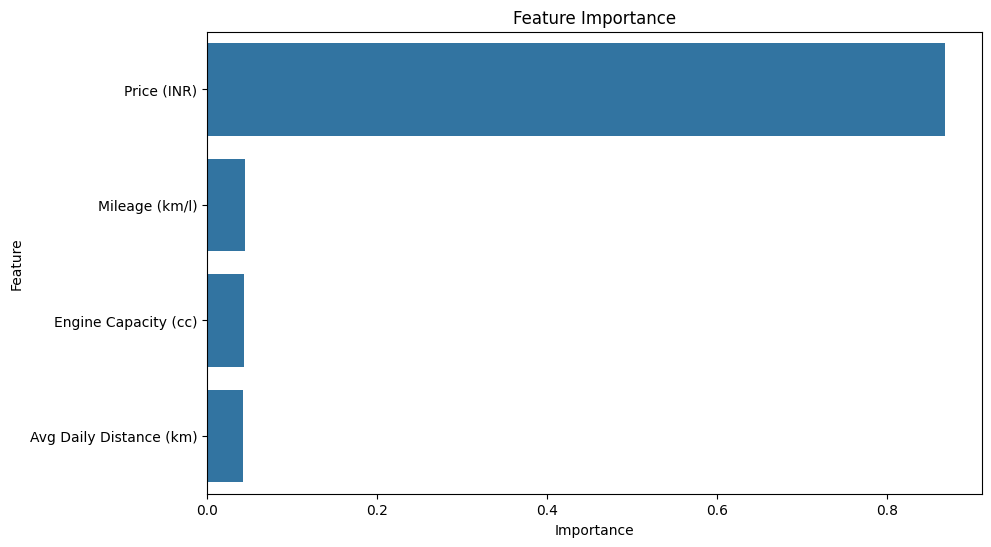

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df)
plt.title('Feature Importance')
plt.show()